# Kideny_1_voi

In [9]:
import os
import pandas as pd
from PIL import Image
import torch
from torchvision.transforms import ToTensor
from tqdm import tqdm
import matplotlib.pyplot as plt
import random
import numpy as np

In [10]:
input_dir = "/kaggle/input/blood-vessel-segmentation/"

### ¿What are the files like?

In [11]:
k1_voi_path = f"{input_dir}train/kidney_1_voi/"
k1_voi_imgs = pd.Series(os.listdir(f"{k1_voi_path}images")).sort_values()
k1_voi_labels = pd.Series(os.listdir(f"{k1_voi_path}labels")).sort_values()

display(k1_voi_imgs)
display(k1_voi_labels)

847     0000.tif
541     0001.tif
731     0002.tif
1299    0003.tif
1176    0004.tif
          ...   
1362    1392.tif
875     1393.tif
631     1394.tif
275     1395.tif
1072    1396.tif
Length: 1397, dtype: object

847     0000.tif
541     0001.tif
731     0002.tif
1299    0003.tif
1176    0004.tif
          ...   
1362    1392.tif
875     1393.tif
631     1394.tif
275     1395.tif
1072    1396.tif
Length: 1397, dtype: object

#### ¿How many of them are there?

Fewer that in the dense dataset.

In [12]:
k1_voi_imgs.nunique(), k1_voi_labels.nunique() 

(1397, 1397)

### ¿All the images and masks have the same shapes?

In [13]:
# check if all the images have the same shape
images_shapes = []
for idx in tqdm(range(len(k1_voi_imgs))):
    image = Image.open(k1_voi_path + "images/" + k1_voi_imgs[idx])
    images_shapes.append((image.height, image.width))

images_shapes = set(images_shapes)
images_shapes

100%|██████████| 1397/1397 [00:02<00:00, 510.91it/s]


{(1928, 1928)}

In [14]:
# check if all the labels have the same shape
labels_shapes = []
for idx in tqdm(range(len(k1_voi_labels))):
    image = Image.open(k1_voi_path + "labels/" + k1_voi_labels[idx])
    labels_shapes.append((image.height, image.width))

labels_shapes = set(labels_shapes)
labels_shapes

100%|██████████| 1397/1397 [00:02<00:00, 505.87it/s]


{(1928, 1928)}

### ¿What are the values of the masks?

In [15]:
mask_values = set()
for idx in tqdm(range(len(k1_voi_labels))):
    label = Image.open(k1_voi_path + "labels/" + k1_voi_labels[idx])
    mask_values.update(ToTensor()(label).unique().tolist())
print(mask_values)

100%|██████████| 1397/1397 [01:41<00:00, 13.76it/s]

{0.0, 1.0}


### Let's look at some examples

Index 1190 of 1397


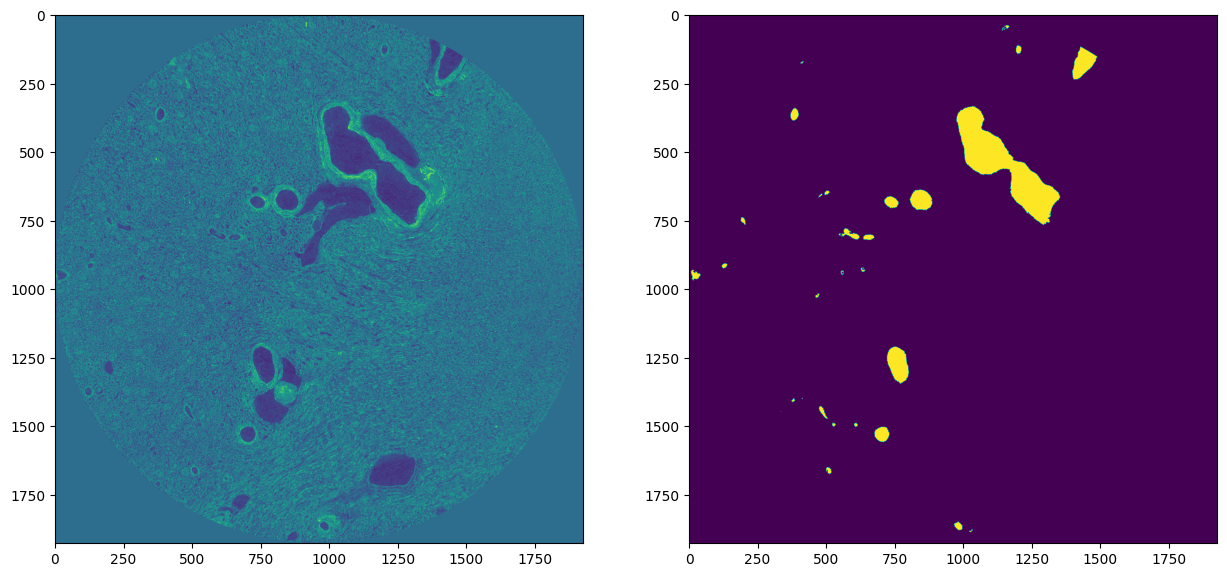

In [49]:
idx = random.randint(0, len(k1_voi_imgs))

image = Image.open(k1_voi_path + "images/" + k1_voi_imgs[idx])
label = Image.open(k1_voi_path + "labels/" + k1_voi_labels[idx])

fig, ax = plt.subplots(1, 2, figsize=(15, 11))
ax[0].imshow(image)
ax[1].imshow(label)

print("Index", idx, "of", len(k1_voi_imgs))
plt.show()

**Observations**

- This images are much more zoomed in than the ones in the dense dataset.
- They also have structure in the sense that all come in a circle.
    - They also come in similar lighting.
- This images are also higher resolution. I say this because the dimensions are bigger.
- There aren't as much REALLY small annotations as opposed to the dense dataset.

#### ¿What about the array values?

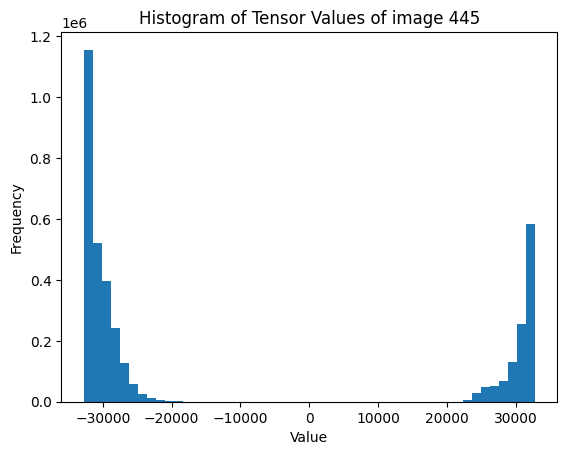

In [70]:
idx = random.randint(0, len(k1_voi_imgs))

image = ToTensor()(Image.open(k1_voi_path + "images/" + k1_voi_imgs[idx]))

plt.hist(image.view(-1).numpy(), 50) 

plt.title(f'Histogram of Tensor Values of image {idx}')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.show()